In [110]:
# imports used on the project
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
# This cell is used to retrieve the name, price, number of reviews, and rating of products on Amazon.com and transform them into a dataframe.

list_of_products = ['laptop','mouse','keyboard','monitor','tablet','smartphones',
                    'graphics+card','desktop+processor','ram+memory','motherboard',
                    'power+supply','pc+case','ssd+nvme']

HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

all_results = []

for page in list_of_products:
    formatted_category = page.replace("+", " ").title()
    for i in range(1,4):
        url = f'https://www.amazon.com/s?k={page}&page={i}'
        
        response = requests.get(url,headers=HEADERS)
        soup = BeautifulSoup(response.content, "html.parser")
        # print(url)

        elements_in_page = soup.find_all('div', attrs={'role': 'listitem'})
        
        results = []
        for item in elements_in_page:
    
            price = item.select_one(
                    "div > div > div.puisg-col.puisg-col-4-of-12.puisg-col-8-of-16.puisg-col-12-of-20.puisg-col-12-of-24.puis-list-col-right > div > div > div:nth-child(3) > div.puisg-col.puisg-col-4-of-12.puisg-col-4-of-16.puisg-col-4-of-20.puisg-col-4-of-24 > div > div.a-section.a-spacing-none.a-spacing-top-micro.puis-price-instructions-style > div > div:nth-child(1) > a > span > span.a-offscreen"
                )
            price_txt = float(price.text.strip('$').replace(',', '')) if price else None
            
            name = item.select_one(
                    "div > div > span > div > div > div > div.puisg-col.puisg-col-4-of-12.puisg-col-8-of-16.puisg-col-12-of-20.puisg-col-12-of-24.puis-list-col-right > div > div > div.a-section.a-spacing-none.puis-padding-right-small.s-title-instructions-style > a > h2"
            )
            name_txt = name.text.strip() if name else None
        
            reviews = item.select_one(
                    "div > div > div > div > span > div > div > div > div.puisg-col.puisg-col-4-of-12.puisg-col-8-of-16.puisg-col-12-of-20.puisg-col-12-of-24.puis-list-col-right > div > div > div.a-section.a-spacing-none.a-spacing-top-micro > div.a-row.a-size-small > span.rush-component > div > a > span"
            )
            reviews_txt = int(reviews.text.strip().replace(',', '')) if reviews else None
        
            Rating = item.select_one(
                    "div > div > div > div > span > div > div > div > div.puisg-col.puisg-col-4-of-12.puisg-col-8-of-16.puisg-col-12-of-20.puisg-col-12-of-24.puis-list-col-right > div > div > div.a-section.a-spacing-none.a-spacing-top-micro > div.a-row.a-size-small > span.a-declarative > a"
            )
            Rating_txt = float(Rating.text.split(" out")[0].strip()) if Rating else None
    
      
            if name_txt != None:
                all_results.append({
                        "Name": name_txt,
                        "Price": price_txt,
                        "Reviews": reviews_txt,
                        "Rating": Rating_txt,
                        "Category": formatted_category
                })
        time.sleep(1)
        
df = pd.DataFrame(all_results)

In [112]:
# Visualizing whether the dataframe was correctly saved.
df

,Name,Price,Reviews,Rating,Category
0,Amazon Fire Max 11 tablet (newest model) vivid...,NaN,11166.0,4.4,Laptop
1,"Amazon Fire HD 10 tablet, 10.1"", 1080p Full HD...",NaN,123587.0,4.5,Laptop
2,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",176.00,2077.0,4.0,Laptop
3,"HP 14"" Ultral Light Laptop for Students and Bu...",265.99,2110.0,4.1,Laptop
4,"Gaming Laptop, 2025 Laptop with Intel Quad-Cor...",379.99,5.0,5.0,Laptop
...,...,...,...,...,...
831,Corsair MP600 PRO LPX 2TB M.2 NVMe PCIe x4 Gen...,149.99,9102.0,4.8,Ssd Nvme
832,FX991 M.2 SSD 1TB NVMe SSD M2 2280 PCIe Gen 4x...,59.99,596.0,4.6,Ssd Nvme
833,"iDsonix M.2 SSD 1TB, PCIe Gen3x4, Speed Up to ...",47.99,74.0,4.4,Ssd Nvme
834,"PNY CS900 500GB 3D NAND 2.5"" SATA III Internal...",25.99,22009.0,4.7,Ssd Nvme


In [113]:
# Checking if there are any null values in the dataframe
df.isna().sum()

Name          0
Price       150
Reviews      11
Rating       11
Category      0
dtype: int64

In [114]:
# Excluding any product with missing values

df.dropna(subset=['Price','Reviews','Rating'], inplace=True)
df.isna().sum()


Name        0
Price       0
Reviews     0
Rating      0
Category    0
dtype: int64

In [115]:
select = df[df['Price'] == 0].index
df = df.drop(select)

Category
Laptop               484.951591
Graphics Card        330.198871
Smartphones          287.792353
Desktop Processor    254.910588
Motherboard          187.720167
Pc Case              122.797667
Tablet               107.708000
Monitor              106.224737
Power Supply         105.226885
Ssd Nvme              93.614839
Ram Memory            77.207544
Mouse                 71.514516
Keyboard              59.533710
Name: Price, dtype: float64


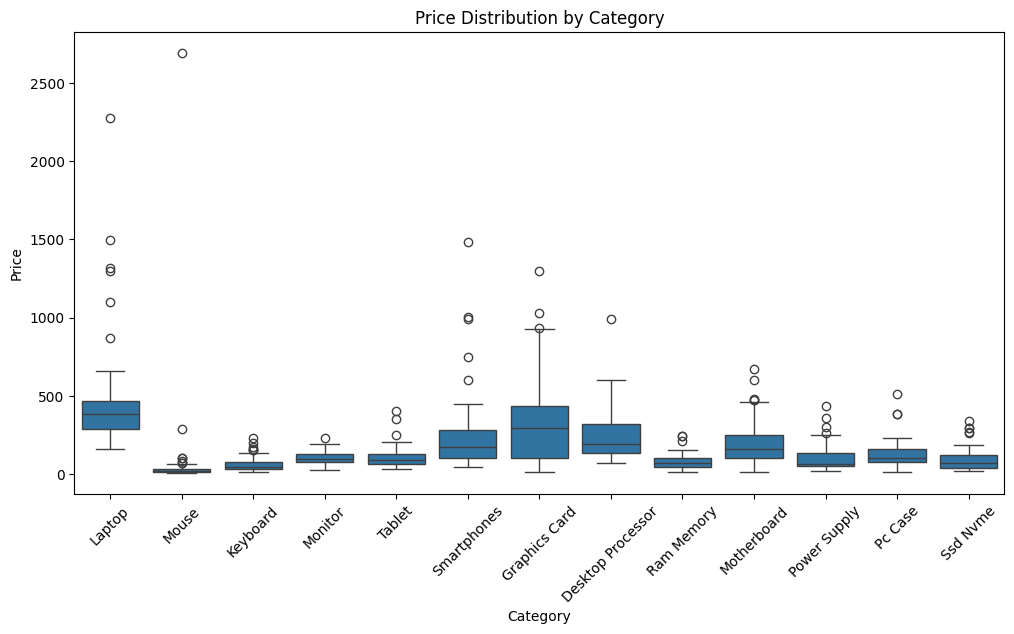

In [116]:
# boxplot of the price distribution by category
avg_price_per_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_category)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Price')
plt.xticks(rotation=45)
plt.title("Price Distribution by Category")
plt.show()

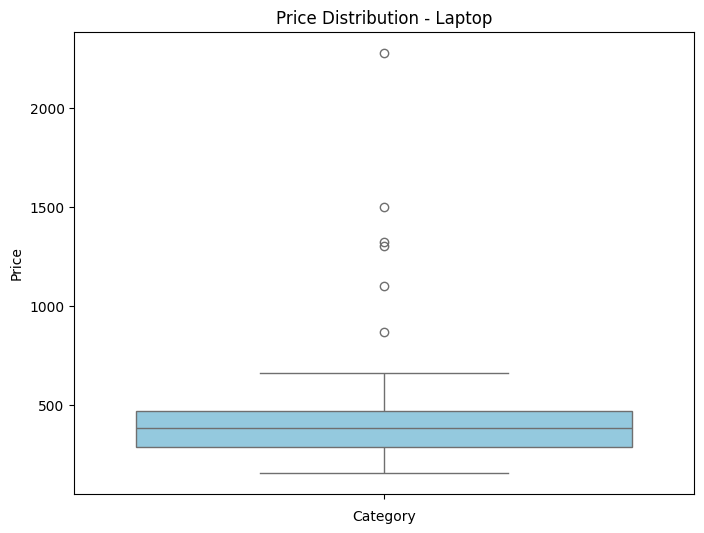

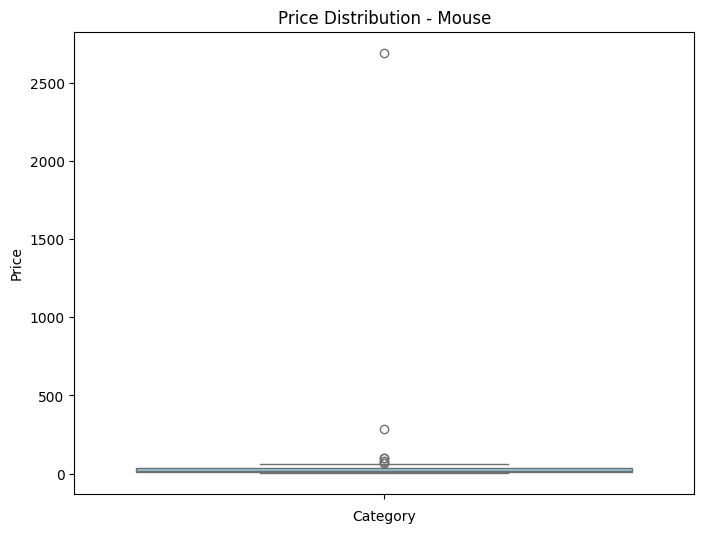

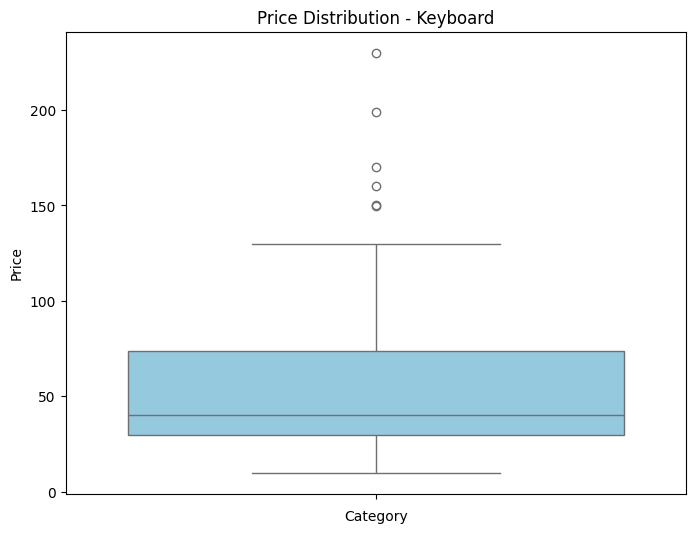

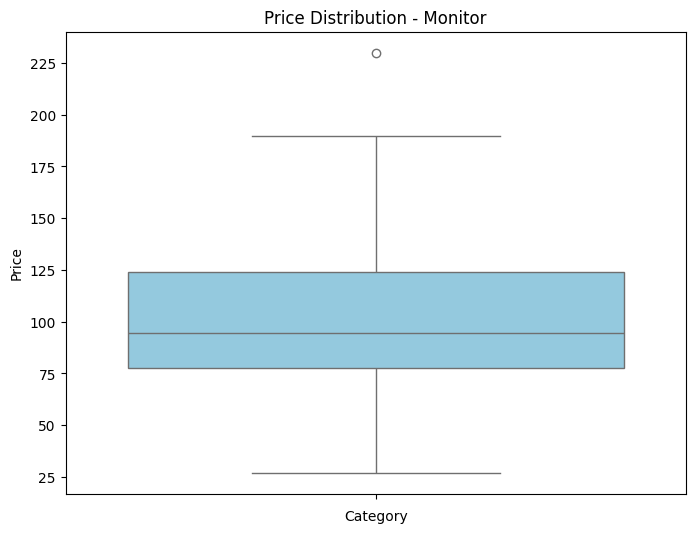

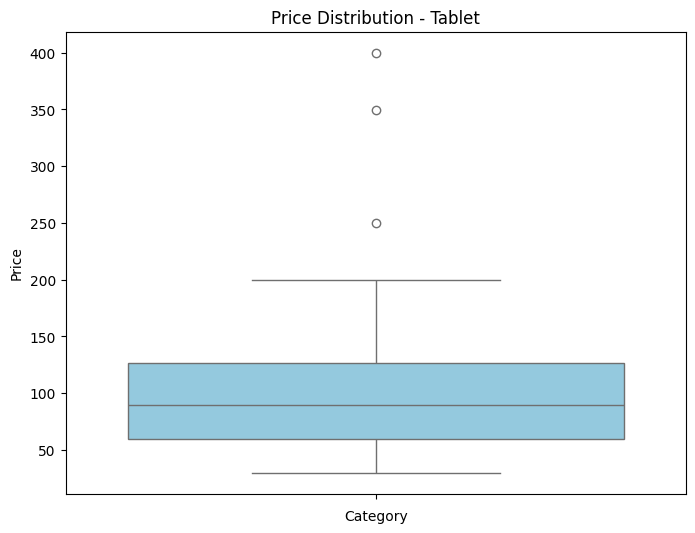

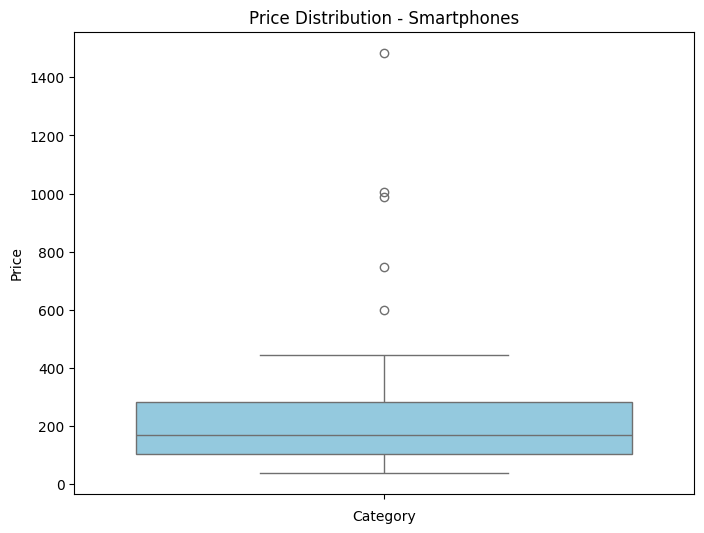

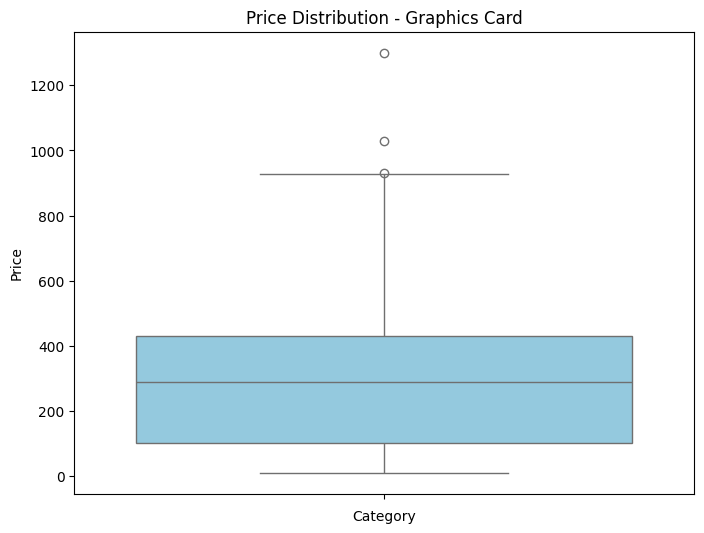

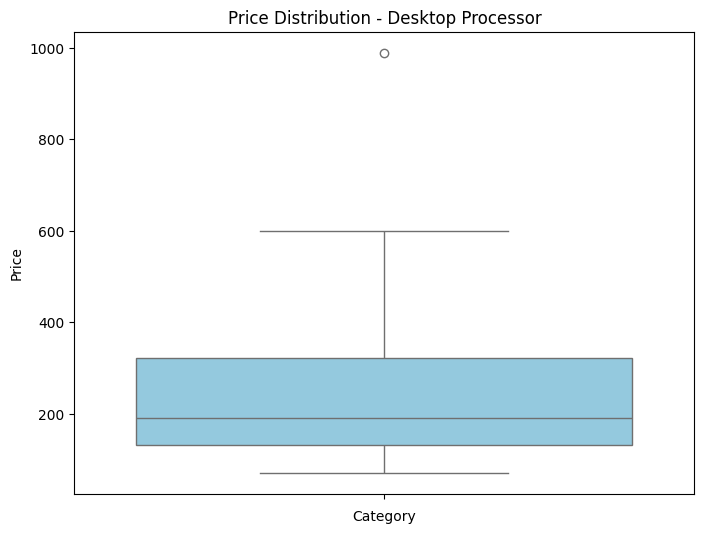

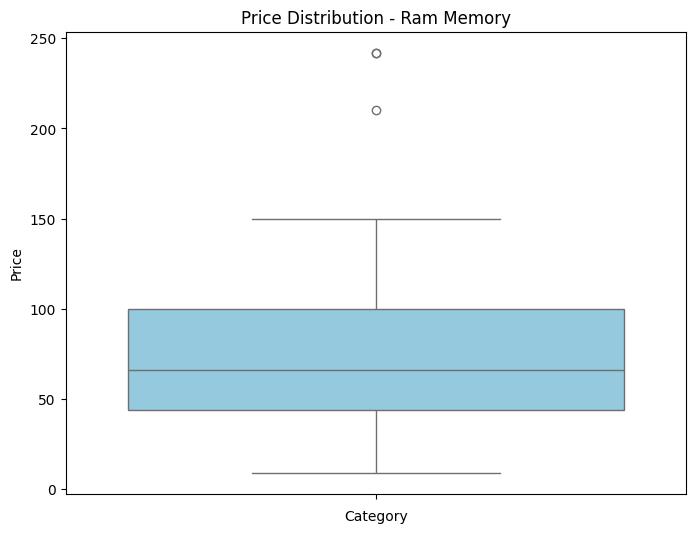

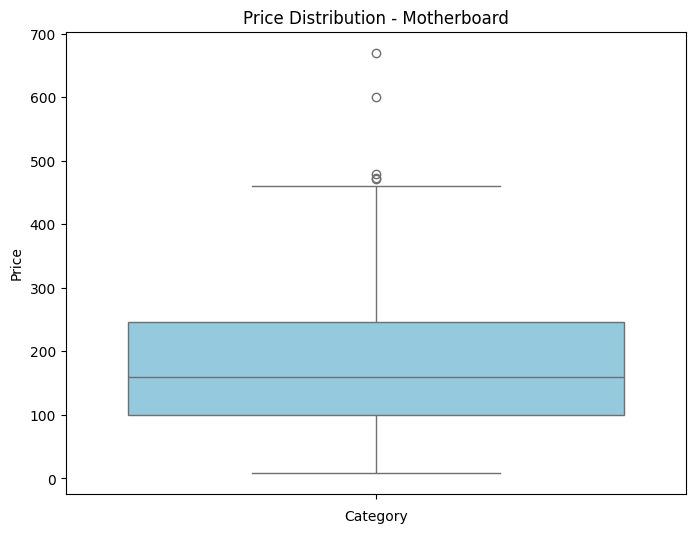

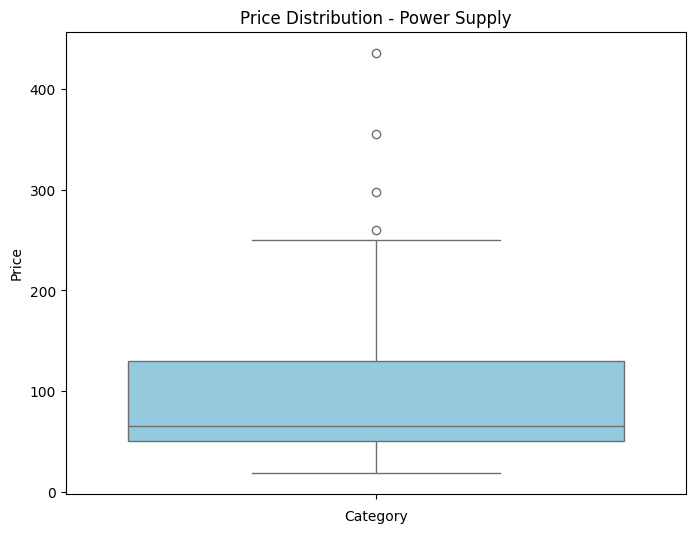

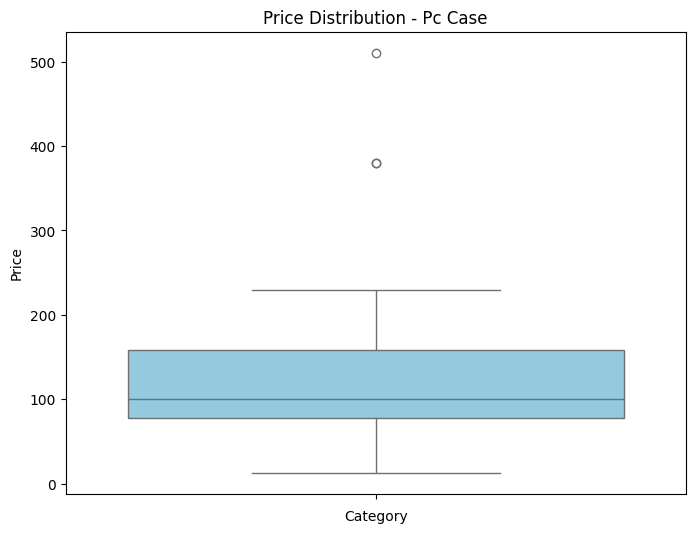

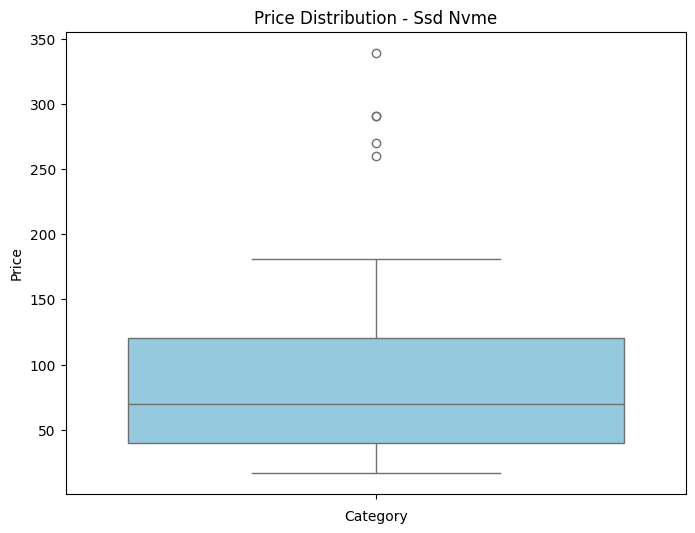

In [117]:
categories = df['Category'].unique()  

for category in categories:
    plt.figure(figsize=(8, 6))
    
    category_data = df[df['Category'] == category]
    
    sns.boxplot(data=category_data, y='Price', color='skyblue')
    
    plt.title(f'Price Distribution - {category}')
    plt.ylabel('Price')
    plt.xlabel('Category')
    
    plt.show()

Outliers removed from the 'Laptop' category:


,Name,Price,Reviews,Rating,Category
49,Laptop Computer Intel N97 Windows Laptop 15.6-...,1299.99,5.0,5.0,Laptop
60,"Dell Alienware m16 R2 Laptop (2024) | 16"" 2560...",2278.99,1.0,5.0,Laptop


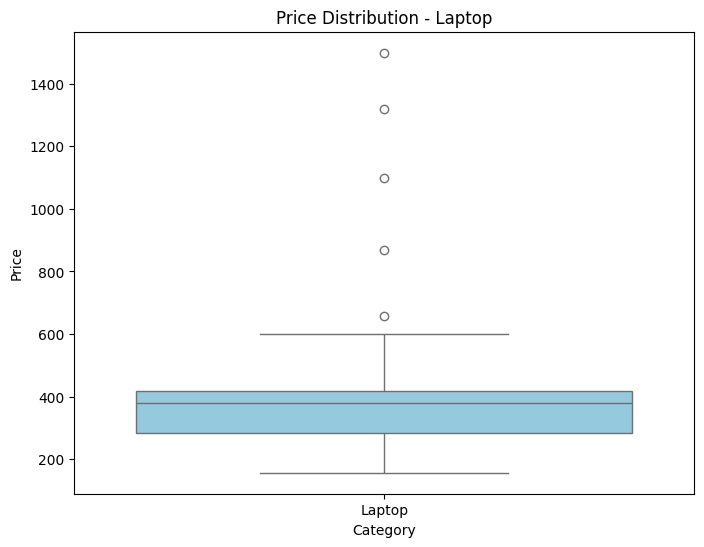

Outliers removed from the 'Mouse' category:


,Name,Price,Reviews,Rating,Category
128,Tt eSPORTS Ventus R 5000DPI Optical RGB 5 Butt...,2693.5,18.0,4.2,Mouse


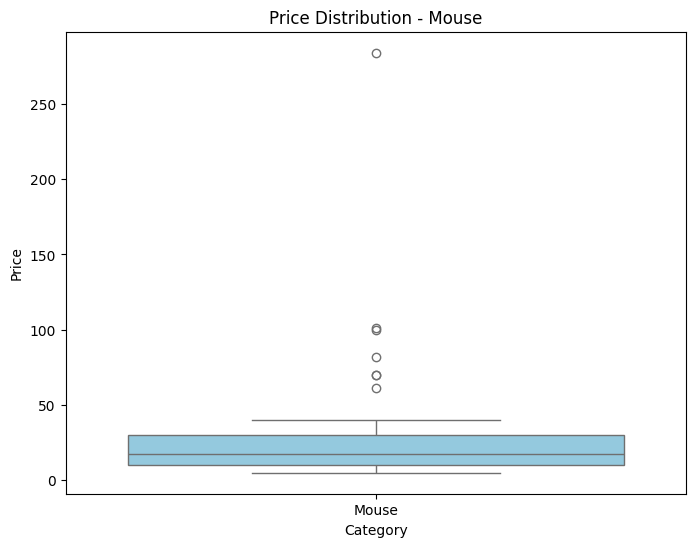

Outliers removed from the 'Keyboard' category:


,Name,Price,Reviews,Rating,Category


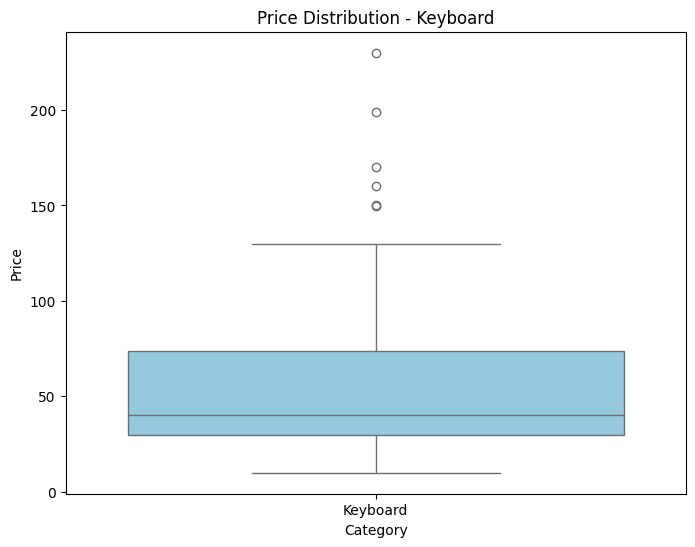

Outliers removed from the 'Monitor' category:


,Name,Price,Reviews,Rating,Category


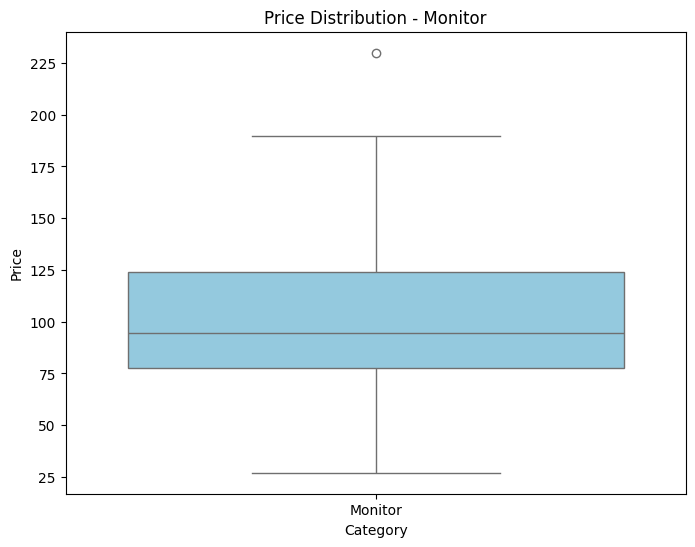

Outliers removed from the 'Tablet' category:


,Name,Price,Reviews,Rating,Category


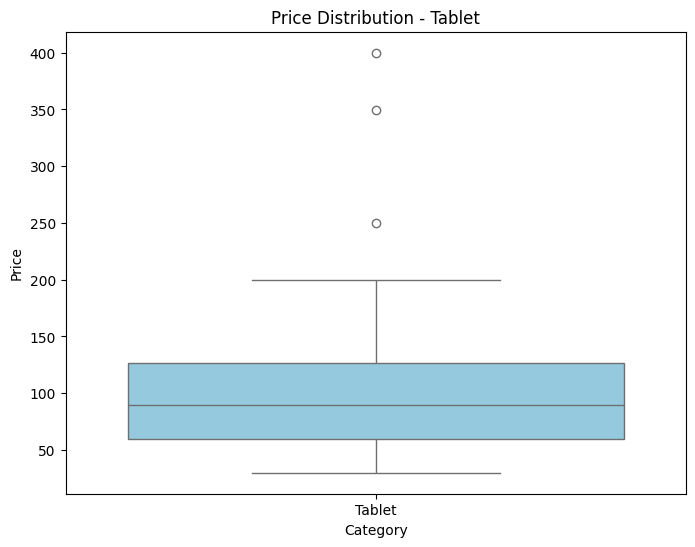

Outliers removed from the 'Smartphones' category:


,Name,Price,Reviews,Rating,Category


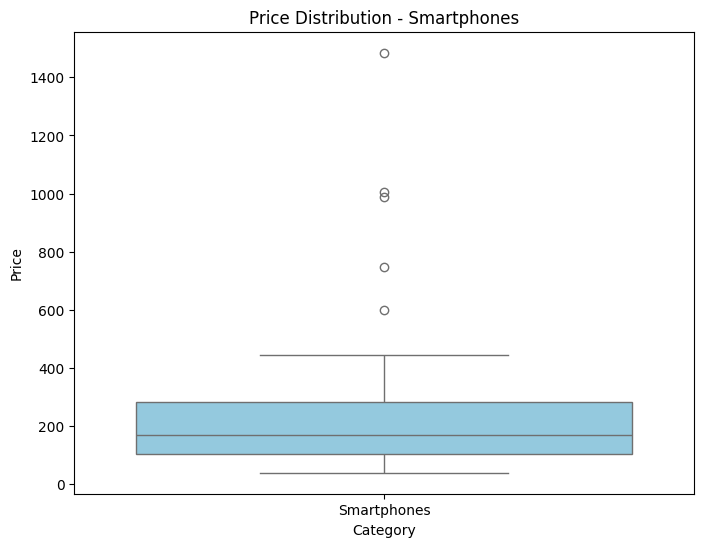

Outliers removed from the 'Graphics Card' category:


,Name,Price,Reviews,Rating,Category
439,ASUS ROG XG Mobile (2023) External Graphics Ca...,1299.99,24.0,3.9,Graphics Card


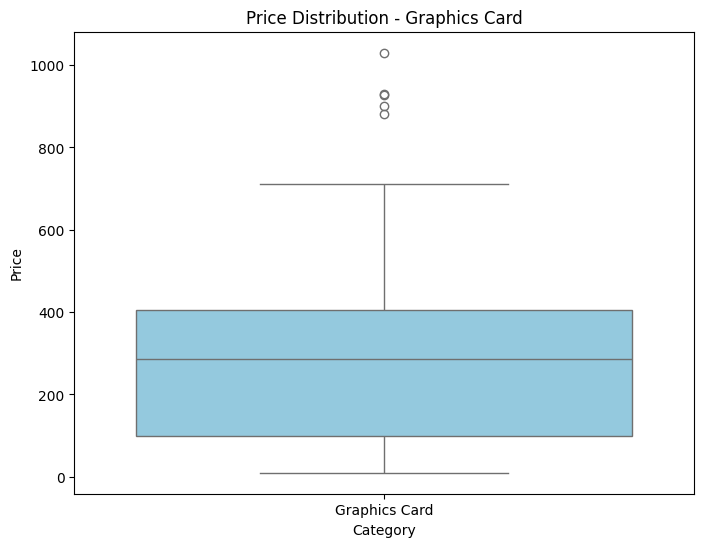

Outliers removed from the 'Desktop Processor' category:


,Name,Price,Reviews,Rating,Category


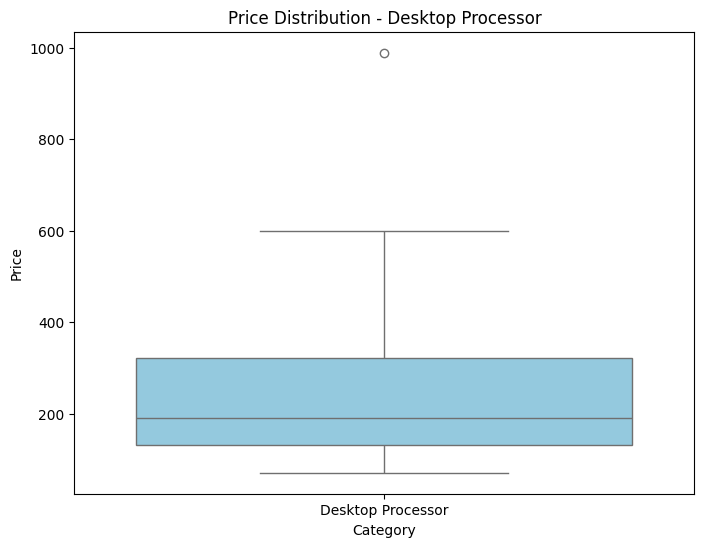

Outliers removed from the 'Ram Memory' category:


,Name,Price,Reviews,Rating,Category


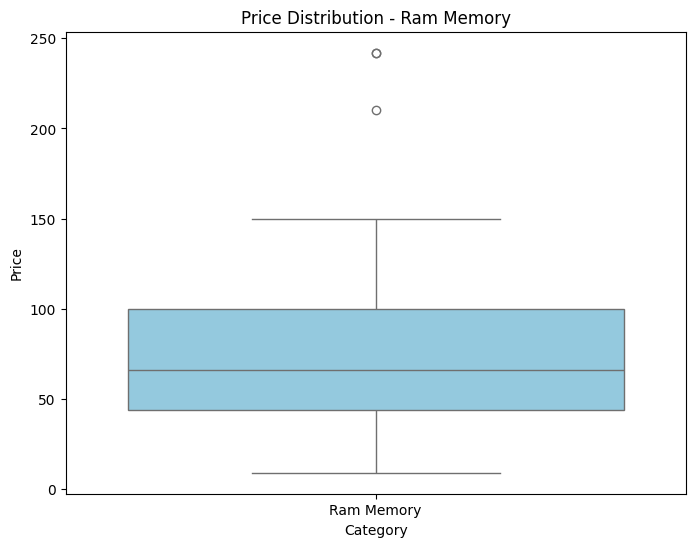

Outliers removed from the 'Motherboard' category:


,Name,Price,Reviews,Rating,Category
579,ASUS ROG Maximus Z890 Hero Intel® Z890 LGA 185...,669.99,13.0,4.1,Motherboard
584,MINISFORUM Motherboard BD795M M-ATX Motherboar...,479.00,3.0,5.0,Motherboard
628,"AMD Ryzen™ 9 7900X 12-Core, 24-Thread Unlocked...",600.97,32.0,4.9,Motherboard


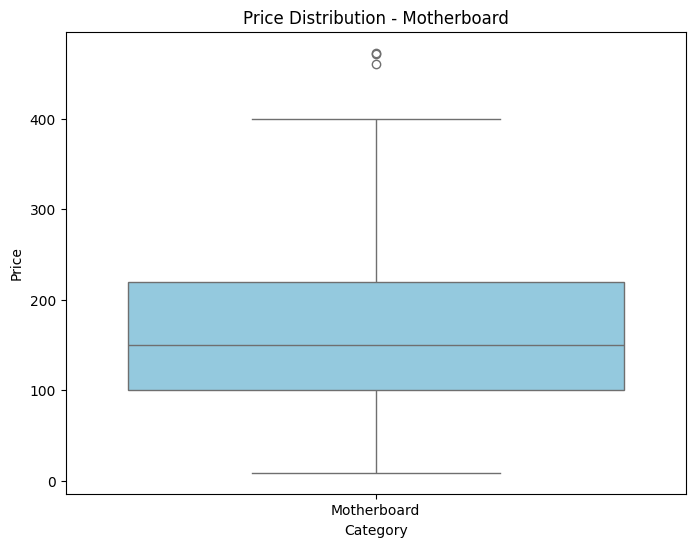

Outliers removed from the 'Power Supply' category:


,Name,Price,Reviews,Rating,Category
694,ASUS ROG Strix 1200W Gold Aura Edition (Fully ...,259.99,27.0,4.3,Power Supply


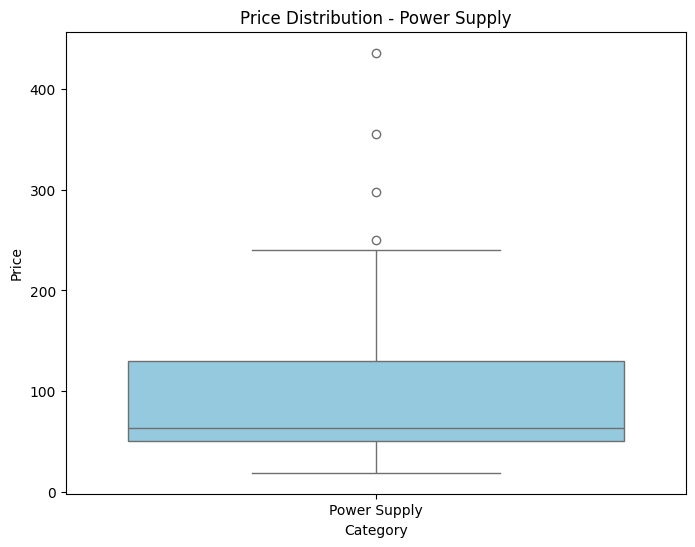

Outliers removed from the 'Pc Case' category:


,Name,Price,Reviews,Rating,Category
717,HYTE Y70 Touch Infinite Dual Chamber ATX Mid T...,379.99,1.0,5.0,Pc Case
730,HYTE Y70 Touch Infinite Dual Chamber ATX Mid T...,379.99,1.0,5.0,Pc Case


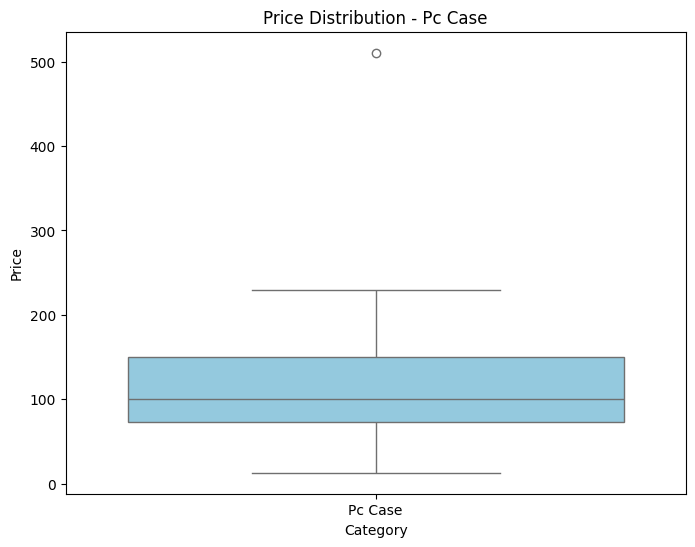

Outliers removed from the 'Ssd Nvme' category:


,Name,Price,Reviews,Rating,Category


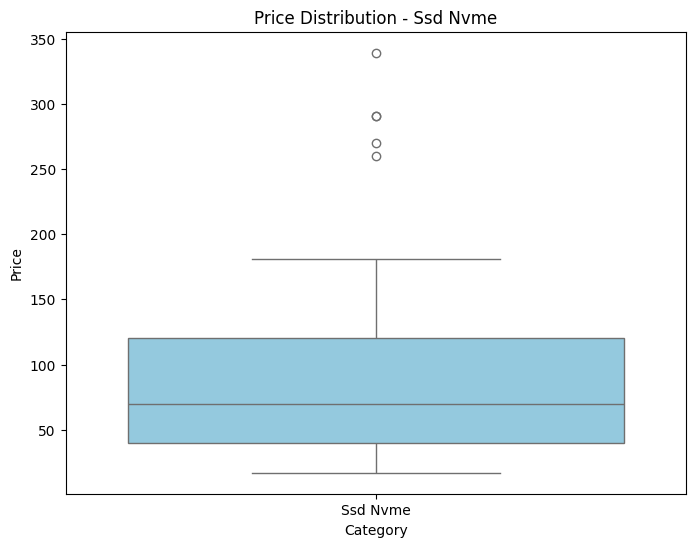

In [118]:
# Removing outliers from the dataframe
categories = df['Category'].unique()  
categories_to_filter = ["Mouse", "Gabinete Pc"]

for category in categories:
    category_data = df[df["Category"] == category]
    
    Q1 = category_data["Price"].quantile(0.25)
    Q3 = category_data["Price"].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = category_data[
        ((category_data["Price"] < lower_limit) | 
         (category_data["Price"] > upper_limit)) &
        (category_data["Reviews"] < 50)  # Remove only if Reviews < 50
    ]
    
    filtered_data = category_data.drop(outliers.index)
    df = df.drop(outliers.index,axis=0)
    
    print(f"Outliers removed from the '{category}' category:")
    display(outliers)
    print("\n")
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=filtered_data, x="Category", y="Price", color="skyblue")
    plt.title(f"Price Distribution - {category}")
    plt.xlabel("Category")
    plt.ylabel("Price")
    plt.show()

In [119]:
# Calculating the cost benefit of each product and displaying the top 5 products with the best cost benefit for each category
df['Cost Benefit'] = df['Rating'] / df['Price']

categories = df['Category'].unique()

for category in categories:

    df_category = df[df['Category'] == category]

    display(df_category.sort_values('Cost Benefit', ascending=False)[['Name','Price','Cost Benefit','Category']].head(5))


,Name,Price,Cost Benefit,Category
35,"ASUS Chromebook CM14 Laptop, 14"" HD Anti-Glare...",156.48,0.026840,Laptop
15,"HP Chromebook 14 Laptop, Intel Celeron N4120, ...",173.49,0.025362,Laptop
9,HP Chromebook Laptop • 14 Inch Display • Intel...,167.83,0.025025,Laptop
2,"HP 14 Laptop, Intel Celeron N4020, 4 GB RAM, 6...",176.00,0.022727,Laptop
21,"Laptop Computer, 14 Inch Laptop 8GB RAM 128GB ...",199.00,0.022111,Laptop


,Name,Price,Cost Benefit,Category
118,The Mouse and the Motorcycle (Ralph Mouse Book 1),4.99,0.941884,Mouse
77,Amazon Basics Responsive and Precise 3-Button ...,7.19,0.639777,Mouse
71,Amazon Basics Responsive and Precise 3-Button ...,7.19,0.639777,Mouse
79,"Logitech B100 Corded Mouse, Wired USB Mouse fo...",7.99,0.575720,Mouse
84,"WisFox 2.4G Wireless Mouse for Laptop, Ergonom...",7.99,0.550688,Mouse


,Name,Price,Cost Benefit,Category
142,Rii RK907 Ultra-Slim Compact USB Wired Keyboar...,9.99,0.450450,Keyboard
141,"NPET K10V3PRO Gaming Keyboard, RGB Backlit Key...",14.99,0.293529,Keyboard
184,"Computer Keyboard Wired, Plug Play USB , Low P...",14.99,0.286858,Keyboard
189,"Wired Keyboard,Quiet Keyboard,Multimedia Usb C...",16.99,0.264862,Keyboard
152,"65% Gaming Keyboard, Wired Backlit Mini Keyboa...",15.97,0.262993,Keyboard


,Name,Price,Cost Benefit,Category
240,2 Pack 24 Inch Anti Glare Matte Screen Protect...,26.99,0.118562,Monitor
219,Computer Privacy Screen Protector for 27 Inche...,57.12,0.073529,Monitor
201,"AOC 22B2HM2 22"" Full HD (1920 x 1080) 100Hz LE...",63.99,0.068761,Monitor
224,"Sceptre 20"" 1600x900 75Hz Ultra Thin LED Monit...",67.99,0.066186,Monitor
212,"AOC 24B2H2 24” Frameless IPS Monitor, FHD 1920...",74.99,0.060008,Monitor


,Name,Price,Cost Benefit,Category
296,Timecity Case for iPad 9th/ 8th/ 7th Generatio...,29.99,0.153384,Tablet
288,"Tablet 7 inch Android 14.0 Tablet, 4GB+32GB RO...",35.99,0.100028,Tablet
293,"2024 Tablet, Android 12 Tablet, 7 inch Tablet,...",38.99,0.094896,Tablet
314,"Tablet Android 12 Tablets 7 inch, 4GB RAM 32GB...",35.96,0.094549,Tablet
284,"Android 14.0 8inch Tablet, WiFi 6 2GB RAM 32GB...",40.99,0.087826,Tablet


,Name,Price,Cost Benefit,Category
344,C24 | 2024 | All-Day Battery | GSM Unlocked | ...,39.99,0.090023,Smartphones
332,Tracfone | Motorola Moto g Play 2024 | Locked ...,49.88,0.088212,Smartphones
368,"Smartphone Specials of The Day, 6.53 Inch Dual...",57.99,0.086222,Smartphones
346,"TracFone Moto g Pure (2021), 32GB, Blue - Prep...",71.60,0.060056,Smartphones
339,Nokia C2 2E | Android 11 (Go Edition) | Unlock...,59.99,0.055009,Smartphones


,Name,Price,Cost Benefit,Category
401,"Graphics Card GPU Brace Support, Graphics Card...",9.99,0.450450,Graphics Card
432,"GT610 1GB DDR3 Graphics Card, 64bit 1800MHz Co...",31.99,0.125039,Graphics Card
410,"GT610 1GB DDR3 Graphics Card, 64bit 1800MHz Co...",31.99,0.125039,Graphics Card
395,GIGABYTE 2GB RAM DDR3 SDRAM Video Graphics Car...,42.99,0.104676,Graphics Card
443,"GT 730 2GB Graphics Card,64Bit 2048MB GDDR3 Gr...",49.99,0.100020,Graphics Card


,Name,Price,Cost Benefit,Category
493,"AMD Ryzen 3 4100 4-Core, 8-Thread Unlocked Des...",70.86,0.064917,Desktop Processor
467,Intel® Core™ 12th Gen i3-12100F desktop proces...,76.78,0.061214,Desktop Processor
461,Intel® Core™ 12th Gen i3-12100F desktop proces...,76.78,0.061214,Desktop Processor
470,"AMD Ryzen 5 4500 6-Core, 12-Thread Unlocked De...",79.00,0.058228,Desktop Processor
446,"AMD Ryzen 5 5500 6-Core, 12-Thread Unlocked De...",83.47,0.056308,Desktop Processor


,Name,Price,Cost Benefit,Category
542,Timetec 8GB DDR3L / DDR3 1600MHz (DDR3L-1600) ...,8.99,0.522803,Ram Memory
535,Timetec 16GB KIT(2x8GB) DDR3L / DDR3 1600MHz (...,14.99,0.313542,Ram Memory
544,Timetec 16GB DDR4 2400MHz PC4-19200 Non-ECC Un...,22.99,0.204437,Ram Memory
569,A-Tech 16GB (2x8GB) DDR3/DDR3L 1600MHz PC3L-12...,23.99,0.195915,Ram Memory
539,Timetec 16GB KIT(2x8GB) DDR4 2400MHz PC4-19200...,25.99,0.180839,Ram Memory


,Name,Price,Cost Benefit,Category
595,"420PCS Computer Screw Kit, Motherboard Standof...",8.99,0.522803,Motherboard
593,"420PCS Computer Screw Kit, Motherboard Standof...",8.99,0.522803,Motherboard
617,"420PCS Computer Screw Kit, Motherboard Standof...",8.99,0.522803,Motherboard
614,"502PCS Computer Screws Assortment Kit, Motherb...",9.99,0.470470,Motherboard
636,"502PCS Computer Screws Assortment Kit, Motherb...",9.99,0.470470,Motherboard


,Name,Price,Cost Benefit,Category
649,"24V 10A Switching Power Supply, AC/DC Voltage ...",18.99,0.236967,Power Supply
660,"24V 10A Switching Power Supply, AC/DC Voltage ...",18.99,0.236967,Power Supply
668,APEVIA VENUS450W 450W ATX Power Supply with Au...,25.99,0.161601,Power Supply
670,Dell 240W Watt 3WN11 H240AS-00 2TXYM 709MT Pow...,29.98,0.153436,Power Supply
692,Dell 240W Watt 3WN11 H240AS-00 2TXYM 709MT Pow...,29.98,0.153436,Power Supply


,Name,Price,Cost Benefit,Category
721,Thermalright TL-C12C-S X3 CPU Fan 120mm ARGB C...,12.98,0.354391,Pc Case
707,Cooler Master MasterBox Q300L Micro-ATX Tower ...,36.99,0.121655,Pc Case
731,"Bgears b-Optillusion Gaming PC ATX case, Speci...",57.99,0.077600,Pc Case
756,GAMDIAS White RGB Gaming ATX Mid Tower Compute...,57.99,0.077600,Pc Case
763,| Nova Series C013 | ATX Mid-Tower PC Case | B...,52.99,0.073599,Pc Case


,Name,Price,Cost Benefit,Category
835,Timetec 256GB SSD 3D NAND SATA III 6Gb/s M.2 2...,16.99,0.264862,Ssd Nvme
813,Timetec 256GB SSD 3D NAND SATA III 6Gb/s M.2 2...,16.99,0.264862,Ssd Nvme
811,"ORICO 256GB M.2 NVMe SSD, PCIe Gen3x4 2280 SSD...",19.99,0.225113,Ssd Nvme
819,SK hynix OEM Gamer 256GB M.2 2280 Gaming Gen4 ...,23.98,0.191827,Ssd Nvme
829,OEM Samsung PM9B1 256GB M.2 PCI-e GEN 4X4 NVME...,24.99,0.184074,Ssd Nvme


In [120]:
# after analyzing the data, we can see that the categories are not well defined, so we will create a class to categorize the products based on their names.
# whith help of ClaudAI to help me with the categorization
from typing import Dict, List, Optional
import re

class ProductCategorizer:
    def __init__(self):
        # Define keywords for each category
        self.category_keywords = {
            'Laptop': [
                'laptop', 'notebook', 'chromebook', 'macbook', 
                'gaming laptop', 'portable computer'
            ],
            'Mouse': [
                'mouse', 'gaming mouse', 'wireless mouse', 'optical mouse',
                'ergonomic mouse', 'bluetooth mouse'
            ],
            'Keyboard': [
                'keyboard', 'mechanical keyboard', 'gaming keyboard',
                'wireless keyboard', 'ergonomic keyboard'
            ],
            'Monitor': [
                'monitor', 'display', 'screen', 'lcd', 'led monitor',
                'gaming monitor', 'curved monitor'
            ],
            'Tablet': [
                'tablet', 'ipad', 'android tablet', 'drawing tablet',
                'graphics tablet', 'samsung tab'
            ],
            'Smartphone': [
                'phone', 'smartphone', 'iphone', 'android phone',
                'mobile phone', 'cell phone','dual sim','Camera','5g',
                
            ],
            'Graphics Card': [
                'gpu', 'graphics card', 'video card', 'rtx', 'geforce',
                'radeon', 'gaming gpu', 'Graphic Card'
            ],
            'Processor': [
                'cpu', 'processor', 'ryzen', 'intel', 'core i',
                'desktop processor'
            ],
            'RAM Memory': [
                'ram', 'memory', 'ddr4', 'ddr5', 'dimm',
                'memory module', 'gaming memory'
            ],
            'Motherboard': [
                'motherboard', 'mainboard', 'system board', 'mobo',
                'gaming motherboard'
            ],
            'Power Supply': [
                'psu', 'power supply', 'power unit', 'ups',
                'gaming power supply'
            ],
            'PC Case': [
                'case', 'cabinet', 'tower', 'pc case', 'computer case',
                'gaming case', 'gabinete'
            ],
            'Ssd Nvme': [
                'ssd', 'nvme','m.2', 'solid state','pcie','hard drive'
            ],
            'Book': [
                'book', 'novel', 'story', 'reading', 'literature',
                'paperback', 'hardcover'
            ],
            'Storage': [
                'hard disk drive', 'hdd', 'storage drive', 'hdd'
            ],
            'Other': []  # Default category
        }
        
        # Compile regex patterns for each category
        self.category_patterns = {
            category: re.compile('|'.join(r'\b' + re.escape(keyword.lower()) + r'\b' 
                               for keyword in keywords), re.IGNORECASE)
            for category, keywords in self.category_keywords.items()
            if keywords  # Skip 'Other' category as it has no keywords
        }

    def categorize(self, product_name: str) -> str:
        """
        Categorize a product based on its name.
        
        Args:
            product_name (str): The name of the product to categorize
            
        Returns:
            str: The determined category name
        """
        product_name_lower = product_name.lower()
        
        # Check each category's patterns
        matched_categories = []
        for category, pattern in self.category_patterns.items():
            if pattern.search(product_name_lower):
                matched_categories.append(category)
        
        if not matched_categories:
            return 'Other'
        
        # If multiple categories match, use some heuristics to choose the best one
        if len(matched_categories) > 1:
            # Priority to the category whose keywords appear earlier in the product name
            earliest_positions = {}
            for category in matched_categories:
                pattern = self.category_patterns[category]
                match = pattern.search(product_name_lower)
                if match:
                    earliest_positions[category] = match.start()
            
            return min(earliest_positions.items(), key=lambda x: x[1])[0]
        
        return matched_categories[0]

    def recategorize_dataframe(self, df: 'pd.DataFrame', name_column: str = 'Name') -> 'pd.DataFrame':
        """
        Recategorize all products in a DataFrame based on their names.
        
        Args:
            df (pd.DataFrame): The DataFrame containing product information
            name_column (str): The name of the column containing product names
            
        Returns:
            pd.DataFrame: A copy of the input DataFrame with updated categories
        """
        df = df.copy()
        df['Detected_Category'] = df[name_column].apply(self.categorize)
        return df

    def add_keywords(self, category: str, new_keywords: List[str]) -> None:
        """
        Add new keywords to an existing category.
        
        Args:
            category (str): The category to add keywords to
            new_keywords (List[str]): List of new keywords to add
        """
        if category not in self.category_keywords:
            raise ValueError(f"Category '{category}' does not exist")
            
        self.category_keywords[category].extend(new_keywords)
        # Recompile the pattern for this category
        self.category_patterns[category] = re.compile(
            '|'.join(r'\b' + re.escape(keyword.lower()) + r'\b' 
            for keyword in self.category_keywords[category]), 
            re.IGNORECASE
        )

In [121]:
# The results were not satisfactory, but a possible integration with a more robust AI API could yield better results.

categorizer = ProductCategorizer()

df_recategorized = categorizer.recategorize_dataframe(df)

print("Produtos com categorias diferentes da pesquisa original:")
mismatched = df_recategorized[df_recategorized['Category'] != df_recategorized['Detected_Category']]
display(mismatched[['Name', 'Category', 'Detected_Category']])


Produtos com categorias diferentes da pesquisa original:


,Name,Category,Detected_Category
168,UBOTIE Colorful Computer Wireless Keyboards Mo...,Keyboard,Mouse
178,SABLUTE Large Print Backlit Computer Keyboards...,Keyboard,Smartphone
186,Colorful Wireless Computer Keyboards Mouse Com...,Keyboard,Mouse
296,Timecity Case for iPad 9th/ 8th/ 7th Generatio...,Tablet,PC Case
301,"Lenovo Tab M11, 11” Display, MediaTek Helio G8...",Tablet,Monitor
...,...,...,...
764,Bgears b-Voguish Gaming PC Case with Tempered ...,Pc Case,PC Case
766,Cooler Master HAF 700 EVO E-ATX High Airflow P...,Pc Case,PC Case
767,"darkFlash Full-Tower ATX Gaming PC Case, Back ...",Pc Case,PC Case
768,HYTE Y60 Modern Aesthetic Dual Chamber Panoram...,Pc Case,PC Case


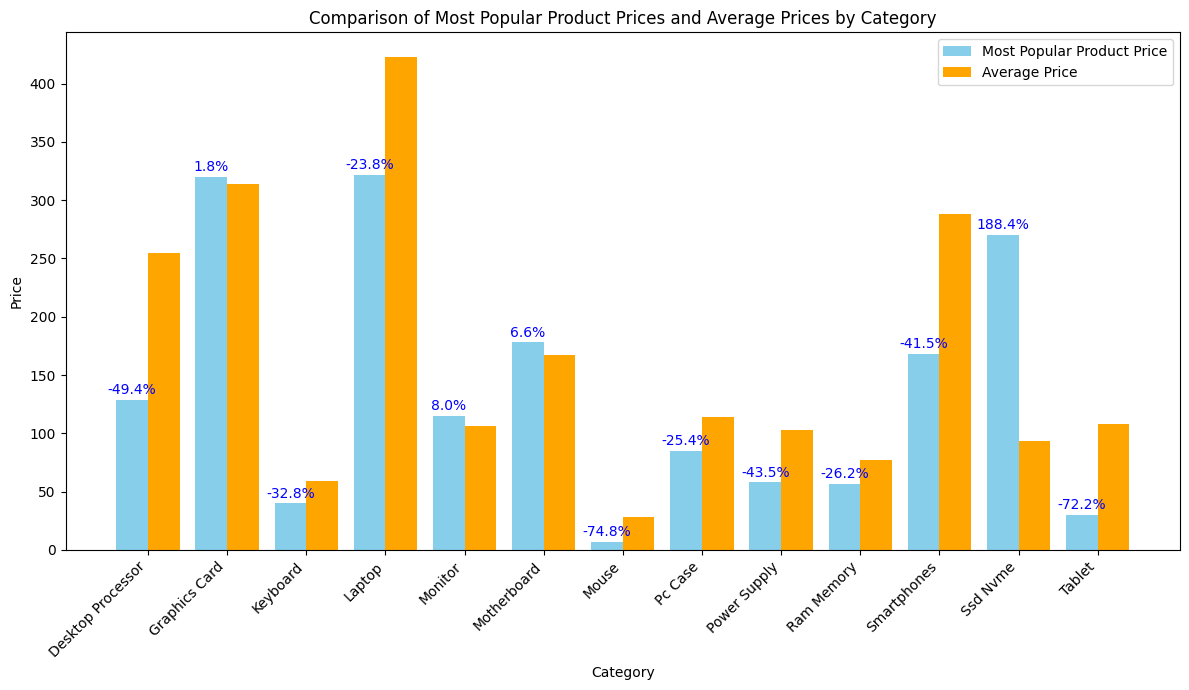

In [122]:
most_popular_per_category = df.loc[df.groupby('Category')['Reviews'].idxmax()]
mean_price_per_category = df.groupby('Category')['Price'].mean()

comparison_df = pd.DataFrame({
    "Category": mean_price_per_category.index,
    "Most Popular Product Price": most_popular_per_category.set_index('Category')['Price'],
    "Average Price": mean_price_per_category
}).reset_index(drop=True)

comparison_df['Percentage Difference'] = (
    (comparison_df['Most Popular Product Price'] - comparison_df['Average Price']) / comparison_df['Average Price'] * 100
)

plt.figure(figsize=(12, 7))
bar_width = 0.4
categories = comparison_df['Category']
x = range(len(categories))

plt.bar(x, comparison_df["Most Popular Product Price"], width=bar_width, label="Most Popular Product Price", color='skyblue')
plt.bar([i + bar_width for i in x], comparison_df["Average Price"], width=bar_width, label="Average Price", color='orange')

for i, row in comparison_df.iterrows():
    diff_text = f"{row['Percentage Difference']:.1f}%"
    plt.text(i, row['Most Popular Product Price'] + 5, diff_text, ha='center', color='blue')
    plt.text(i + bar_width, row['Average Price'] + 5, "", ha='center', color='orange')
    
plt.xticks([i + bar_width / 2 for i in x], categories, rotation=45, ha='right')
plt.title("Comparison of Most Popular Product Prices and Average Prices by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()


plt.show()

C:\Users\gabriel garcia\AppData\Local\Temp\ipykernel_7440\756765180.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['Price'] * x['Reviews']).sum() / x['Reviews'].sum())


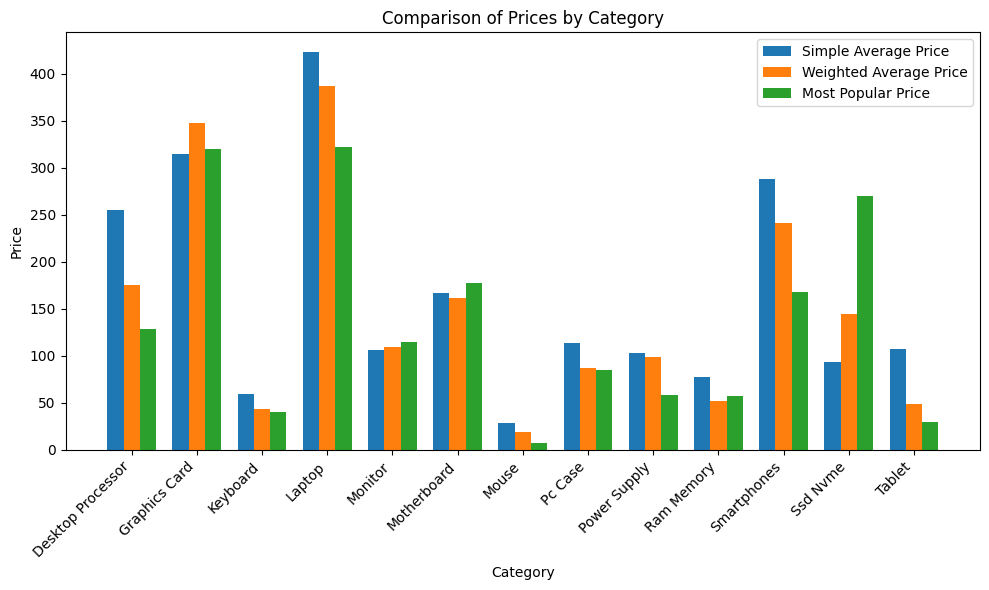

In [123]:
import matplotlib.pyplot as plt
import numpy as np

mean_price_per_category = df.groupby('Category')['Price'].mean()  
weighted_avg_price_per_category = (
    df.groupby('Category', group_keys=False)
    .apply(lambda x: (x['Price'] * x['Reviews']).sum() / x['Reviews'].sum())
)  
most_popular_per_category = df.loc[df.groupby('Category')['Reviews'].idxmax()]  
most_popular_price_per_category = most_popular_per_category.set_index('Category')['Price'] 

comparison_df = pd.DataFrame({
    "Category": mean_price_per_category.index,
    "Simple Average Price": mean_price_per_category.values,
    "Weighted Average Price": weighted_avg_price_per_category.values,
    "Most Popular Price": most_popular_price_per_category.values
})

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(comparison_df["Category"]))  
width = 0.25  

ax.bar(x - width, comparison_df["Simple Average Price"], width, label="Simple Average Price")
ax.bar(x, comparison_df["Weighted Average Price"], width, label="Weighted Average Price")
ax.bar(x + width, comparison_df["Most Popular Price"], width, label="Most Popular Price")

ax.set_xlabel("Category")
ax.set_ylabel("Price")
ax.set_title("Comparison of Prices by Category")
ax.set_xticks(x)
ax.set_xticklabels(comparison_df["Category"], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()